In [154]:
import pandas as pd 
import os 
import matplotlib.pyplot as plt 

In [89]:
files = [file for file in os.listdir('./Sales_Data') if file.endswith('.csv')]

In [90]:
files

['Sales_April_2019.csv',
 'Sales_August_2019.csv',
 'Sales_December_2019.csv',
 'Sales_February_2019.csv',
 'Sales_January_2019.csv',
 'Sales_July_2019.csv',
 'Sales_June_2019.csv',
 'Sales_March_2019.csv',
 'Sales_May_2019.csv',
 'Sales_November_2019.csv',
 'Sales_October_2019.csv',
 'Sales_September_2019.csv']

In [91]:
df = pd.DataFrame()

for file in files:
    file_df = pd.read_csv('Sales_Data/'+file)
    df = pd.concat([df, file_df])
    
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [92]:
len(df)

186850

In [93]:
df.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address'],
      dtype='object')

In [94]:
# cleaning up data 
# Removing nan Data 

In [95]:
nan_df = df[df.isna().any(axis=1)]

In [96]:
len(nan_df)

545

In [97]:
df = df.dropna(how='all')

In [98]:
len(df)

186305

In [99]:
# we have inappropriate data in order data so we have to delete this 

In [100]:
temp_df = df[df['Order Date'].str[0:2] == 'Or']

In [101]:
len(temp_df)

355

In [102]:
temp_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [103]:
df =  df[df['Order Date'].str[0:2] != 'Or']

In [104]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [105]:
# Adding Date Column
df['Full_Date']=df['Order Date'].str[:-5]

In [106]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Full_Date
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04/19/19
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04/07/19
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04/12/19
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04/12/19
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04/30/19


In [107]:
df['Month'] = df['Order Date'].str[:2]

In [108]:
df['Hour'] = df['Order Date'].str[9:11]

In [109]:
df.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Full_Date,Month,Hour
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04/19/19,04,08
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04/07/19,04,22


In [110]:
months_mapping = {
    '01' : 'January', 
    '02' : 'Febaruary',
    '03' : 'March',
    '04' : 'April',
    '05' : 'May',
    '06' : 'June',
    '07' : 'July',
    '08' : 'August',
    '09' : 'September',
    '10' : 'October',
    '11' : 'November',
    '12' : 'December'
}

In [111]:
df['Months_name'] = df['Month'].map(months_mapping)

In [112]:
df.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Full_Date,Month,Hour,Months_name
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04/19/19,04,08,April
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04/07/19,04,22,April


In [113]:
df[['Month', 'Months_name']].value_counts()

Month  Months_name
12     December       24984
10     October        20282
04     April          18279
11     November       17573
05     May            16566
03     March          15153
07     July           14293
06     June           13554
02     Febaruary      11975
08     August         11961
09     September      11621
01     January         9709
dtype: int64

In [114]:
df.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
Full_Date           object
Month               object
Hour                object
Months_name         object
dtype: object

In [115]:
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'])

In [116]:
df.dtypes

Order ID            object
Product             object
Quantity Ordered     int64
Price Each          object
Order Date          object
Purchase Address    object
Full_Date           object
Month               object
Hour                object
Months_name         object
dtype: object

In [117]:
df['Price Each'] = pd.to_numeric(df['Price Each'], errors='coerce').astype(float)

In [122]:
df['Sales'] = df['Quantity Ordered'] * df['Price Each']

In [119]:
df['Price Each'].dtype

dtype('float64')

In [123]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Full_Date,Month,Hour,Months_name,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04/19/19,04,08,April,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04/07/19,04,22,April,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04/12/19,04,14,April,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04/12/19,04,14,April,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04/30/19,04,09,April,11.99


In [121]:
# del df['Sales']

In [141]:
df = df[['Order ID', 'Product', 'Purchase Address', 'City',  'Order Date', 'Full_Date', 'Month', 'Hour', 'Months_name' , 'Quantity Ordered', 'Price Each', 'Sales']]

In [125]:
df.head()

,Order ID,Product,Purchase Address,Order Date,Full_Date,Month,Hour,Months_name,Quantity Ordered,Price Each,Sales
0,176558,USB-C Charging Cable,"917 1st St, Dallas, TX 75001",04/19/19 08:46,04/19/19,04,08,April,2,11.95,23.90
2,176559,Bose SoundSport Headphones,"682 Chestnut St, Boston, MA 02215",04/07/19 22:30,04/07/19,04,22,April,1,99.99,99.99
3,176560,Google Phone,"669 Spruce St, Los Angeles, CA 90001",04/12/19 14:38,04/12/19,04,14,April,1,600.00,600.00
4,176560,Wired Headphones,"669 Spruce St, Los Angeles, CA 90001",04/12/19 14:38,04/12/19,04,14,April,1,11.99,11.99
5,176561,Wired Headphones,"333 8th St, Los Angeles, CA 90001",04/30/19 09:27,04/30/19,04,09,April,1,11.99,11.99


In [138]:
# Corrected get_city function
def get_city(address):
    try:
        return address.split(',')[1].strip()
    except IndexError:
        return None  # Handle cases where the city part is missing

# Corrected get_state function
def get_state(address):
    try:
        return address.split(',')[2].split(' ')[1].strip()  # Use [1] for state abbreviation
    except IndexError:
        return None  # Handle cases where the state part is missing


In [139]:
# Apply the functions to create a 'City (State)' column
df['City'] = df['Purchase Address'].apply(lambda x: f"{get_city(x)} ({get_state(x)})" if get_city(x) and get_state(x) else None)

In [142]:
df.head()

,Order ID,Product,Purchase Address,City,Order Date,Full_Date,Month,Hour,Months_name,Quantity Ordered,Price Each,Sales
0,176558,USB-C Charging Cable,"917 1st St, Dallas, TX 75001",Dallas (TX),04/19/19 08:46,04/19/19,04,08,April,2,11.95,23.90
2,176559,Bose SoundSport Headphones,"682 Chestnut St, Boston, MA 02215",Boston (MA),04/07/19 22:30,04/07/19,04,22,April,1,99.99,99.99
3,176560,Google Phone,"669 Spruce St, Los Angeles, CA 90001",Los Angeles (CA),04/12/19 14:38,04/12/19,04,14,April,1,600.00,600.00
4,176560,Wired Headphones,"669 Spruce St, Los Angeles, CA 90001",Los Angeles (CA),04/12/19 14:38,04/12/19,04,14,April,1,11.99,11.99
5,176561,Wired Headphones,"333 8th St, Los Angeles, CA 90001",Los Angeles (CA),04/30/19 09:27,04/30/19,04,09,April,1,11.99,11.99


In [145]:
# Convert Sales to integer for clear representation
df['Sales'] = df['Sales'].round(0).astype(int)

In [148]:
df['Price Each'] = df['Price Each'].round(0).astype(int)

In [150]:
# to get highest sales by city

# city_result  = df.groupby('City').sum()
city_result  = df.groupby('City')['Sales'].sum().reset_index()

In [151]:
city_result

,City,Sales
0,Atlanta (GA),2796089
1,Austin (TX),1819974
2,Boston (MA),3662442
3,Dallas (TX),2768570
4,Los Angeles (CA),5453750
5,New York City (NY),4665294
6,Portland (ME),449861
7,Portland (OR),1871131
8,San Francisco (CA),8263965
9,Seattle (WA),2748337


In [152]:
df['City'].uniqueue()

array(['Dallas (TX)', 'Boston (MA)', 'Los Angeles (CA)',
       'San Francisco (CA)', 'Seattle (WA)', 'Atlanta (GA)',
       'New York City (NY)', 'Portland (OR)', 'Austin (TX)',
       'Portland (ME)'], dtype=object)

In [158]:
cities = df['City'].unique()

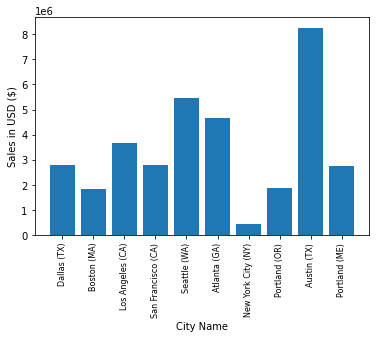

In [159]:
plt.bar(cities, city_result['Sales'])
plt.xticks(cities, rotation='vertical', size=8)
plt.ylabel('Sales in USD ($)')
plt.xlabel('City Name')
plt.show()

In [161]:
df.columns

Index(['Order ID', 'Product', 'Purchase Address', 'City', 'Order Date',
       'Full_Date', 'Month', 'Hour', 'Months_name', 'Quantity Ordered',
       'Price Each', 'Sales'],
      dtype='object')

In [163]:
df.rename(columns={
    'Months_name': 'Months'
}, inplace=True)

In [169]:
# to change the value on basis of some case 
df.loc[
    df['Quantity Ordered'] == 3, 'Quantity Ordered'
]= 2

In [170]:
df[
    df['Quantity Ordered'] == 2
]

,Order ID,Product,Purchase Address,City,Order Date,Full_Date,Month,Hour,Months,Quantity Ordered,Price Each,Sales
0,176558,USB-C Charging Cable,"917 1st St, Dallas, TX 75001",Dallas (TX),04/19/19 08:46,04/19/19,04,08,April,2,12,24
28,176583,AAA Batteries (4-pack),"146 Jackson St, Portland, OR 97035",Portland (OR),04/20/19 12:00,04/20/19,04,12,April,2,3,6
32,176586,AAA Batteries (4-pack),"365 Center St, San Francisco, CA 94016",San Francisco (CA),04/10/19 17:00,04/10/19,04,17,April,2,3,6
40,176593,Lightning Charging Cable,"906 7th St, Portland, OR 97035",Portland (OR),04/15/19 13:45,04/15/19,04,13,April,2,15,30
42,176595,Wired Headphones,"383 6th St, Los Angeles, CA 90001",Los Angeles (CA),04/02/19 09:11,04/02/19,04,09,April,2,12,36
...,...,...,...,...,...,...,...,...,...,...,...,...
11665,259338,AAA Batteries (4-pack),"666 Lakeview St, Boston, MA 02215",Boston (MA),09/02/19 21:29,09/02/19,09,21,September,2,3,6
11666,259339,USB-C Charging Cable,"509 Park St, Austin, TX 73301",Austin (TX),09/12/19 23:43,09/12/19,09,23,September,2,12,24
11667,259340,AA Batteries (4-pack),"544 Hickory St, Los Angeles, CA 90001",Los Angeles (CA),09/18/19 20:18,09/18/19,09,20,September,2,4,8
11671,259344,AAA Batteries (4-pack),"721 Madison St, San Francisco, CA 94016",San Francisco (CA),09/10/19 23:33,09/10/19,09,23,September,2,3,6
